### Importing the data

1. We'll use the MNIST dataset

In [1]:
# Base Libraries
import cv2 as cv
import numpy as np
import pandas as pd

# Loading the minst dataset
from keras.datasets import mnist 

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# Sklearn dependencies
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

**Importing the whole data**

In [2]:
# Loading the dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Checking X
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# To check the data
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (60000, 28, 28) , y_train: (60000,)
X_test: (10000, 28, 28) , y_test: (10000,)


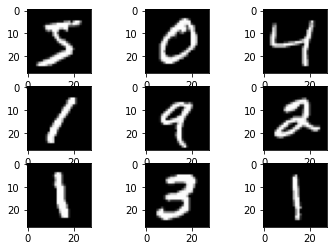

In [5]:
# Printing the images
for i in range(9):
  # Defining Subplot
  plt.subplot(330 + 1 + i)

  # Plotting the image
  plt.imshow(X_train[i], cmap = 'gray')

# Showing the plot
plt.show()

**Preprocessing the data**

In [6]:
# One hot encoding the data
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Checking the shapes
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
# To check the data reshaping
X_train_shape = X_train.shape
X_test_shape  = X_test.shape

print(f"X_train: {X_train_shape} , X_test: {X_train_shape}")

X_train: (60000, 28, 28, 1) , X_test: (60000, 28, 28, 1)


### Prepare Pixel Data
1. Normalize

In [10]:
# Convert from integers to floats
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # Normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  # Return normalized images
  return train_norm, test_norm

### Defining the Model

In [11]:
def my_model(number_filters, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Filters {number_filters}------------------------------------\n\n\n")
  # Layer 1
  model.add(Conv2D(number_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

**Running the model**

1. Different # of Filters

In [12]:
# Automated loop for different # of Filterss
number_filter = [3, 4, 32, 128, 512, 2056]
test_acc = []
train_acc = []
time_ls = []

for i in number_filter:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Filters 3------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1415 - accuracy: 0.9636



------------------------------------Filters 4------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9694



------------------------------------Filters 32------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9791



------------------------------------Filters 128------------------------------------



313/313 [==============================] - 1s 4ms/step - loss: 0.0887 - accuracy: 0.9775



------------------------------------Filters 512------------------------------------



313/313 [==============================] - 2s 6ms/step - loss: 0.1058 - accuracy: 0.9777



------------------------------------Filters 2056------------------------------------



313/313 [==========

In [13]:
print(test_acc)
print(train_acc)
print(time_ls)

[0.9635999798774719, 0.9693999886512756, 0.9790999889373779, 0.9775000214576721, 0.9776999950408936, 0.9764999747276306]
[0.9789833426475525, 0.9803000092506409, 0.9913333058357239, 0.9923999905586243, 0.9948333501815796, 0.9933833479881287]
[29.364259719848633, 24.189356327056885, 25.453785181045532, 46.916311264038086, 127.39341378211975, 495.0593640804291]


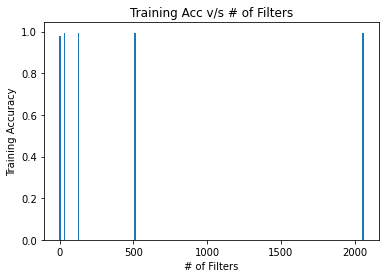

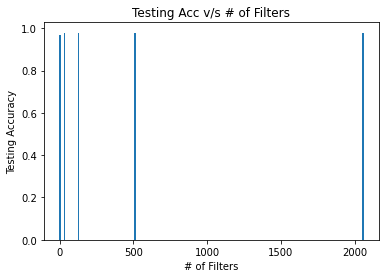

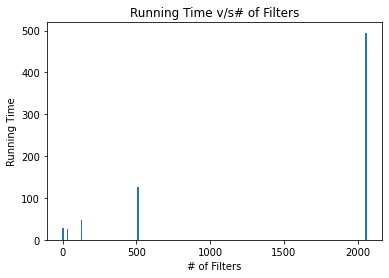

In [14]:
# Creating the bar plots
# Train graph
plt.bar(number_filter, train_acc, width = 10) 

plt.xlabel("# of Filters") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s # of Filters") 
plt.show() 

# Test graph
plt.bar(number_filter, test_acc, width = 10 ) 
  
plt.xlabel("# of Filters") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s # of Filters") 
plt.show() 

# Time graph
plt.bar(number_filter, time_ls, width = 10 ) 
  
plt.xlabel("# of Filters") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s# of Filters") 
plt.show() 

In [15]:
# Calculating the accuracy
'''
Optional to run
You'll have to define the model first
'''
# _, acc = model.evaluate(X_test, y_test, verbose=0)
# print('%.3f' % (acc * 100.0))

"\nOptional to run\nYou'll have to define the model first\n"

2.  Different Number of CL

In [28]:
def my_model(n, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Layers {n}------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Looping
  '''
  Since we're using the same type and # of Filters, etc. in every layer
  '''
  for i in range(1,n):
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [29]:
# Automated loop for different number of layers
number_layers = [1, 2, 3]
test_acc = []
train_acc = []
time_ls = []

for i in number_layers:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Layers 1------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1580 - accuracy: 0.9790



------------------------------------Layers 2------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0567 - accuracy: 0.9864



------------------------------------Layers 3------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9809


In [30]:
print(test_acc)
print(train_acc)
print(time_ls)

[0.9789999723434448, 0.9864000082015991, 0.98089998960495]
[0.9952499866485596, 0.9959999918937683, 0.9910333156585693]
[49.32712697982788, 52.57544684410095, 57.168922662734985]


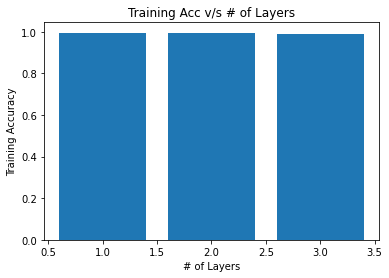

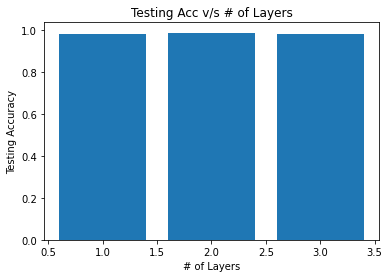

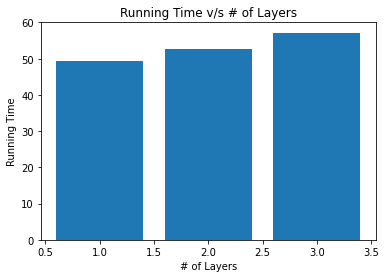

In [31]:
# Creating the bar plots
# Train graph
plt.bar(number_layers, train_acc) 

plt.xlabel("# of Layers") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s # of Layers") 
plt.show() 

# Test graph
plt.bar(number_layers, test_acc) 
  
plt.xlabel("# of Layers") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s # of Layers") 
plt.show() 

# Time graph
plt.bar(number_layers, time_ls) 
  
plt.xlabel("# of Layers") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s # of Layers") 
plt.show() 

3. Different Filter Size

In [32]:
def my_model(n, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Filter Size {n}------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (n, n), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Layer 2
  model.add(Conv2D(16, (n, n), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [33]:
# Automated loop for different filter sizes
number_layers = [3, 5, 7]
test_acc = []
train_acc = []
time_ls = []

for i in number_layers:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Filter Size 3------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9848



------------------------------------Filter Size 5------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9837



------------------------------------Filter Size 7------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9772


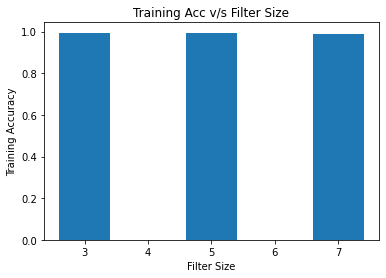

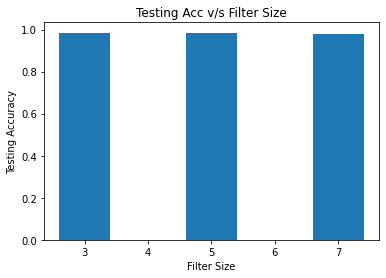

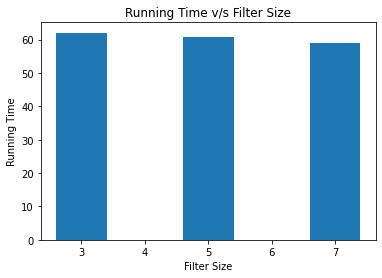

In [34]:
# Creating the bar plots
# Train graph
plt.bar(number_layers, train_acc) 

plt.xlabel("Filter Size") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Filter Size") 
plt.show() 

# Test graph
plt.bar(number_layers, test_acc) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Filter Size") 
plt.show() 

# Time graph
plt.bar(number_layers, time_ls) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Filter Size") 
plt.show() 

4. Different Activation

In [35]:
def my_model(act, X_train, y_train):
  model = keras.Sequential()

  print("\n\n\n------------------------------------Activation Function : ",act,"------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (3, 3), activation=act, input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Layer 2
  model.add(Conv2D(16, (3, 3), activation=act))
  model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation=act))

  #FCL2
  model.add(Dense(10, activation=act))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [36]:
# Automated loop for different activation functions
number_layers = ['sigmoid', 'tanh', 'relu']
test_acc = []
train_acc = []
time_ls = []

for i in number_layers:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Activation Function :  sigmoid ------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9887



------------------------------------Activation Function :  tanh ------------------------------------



313/313 [==============================] - 1s 2ms/step - loss: 7.9366 - accuracy: 0.1329



------------------------------------Activation Function :  relu ------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 4.3185 - accuracy: 0.6978


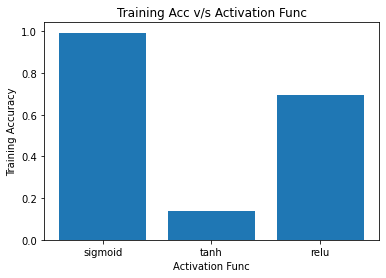

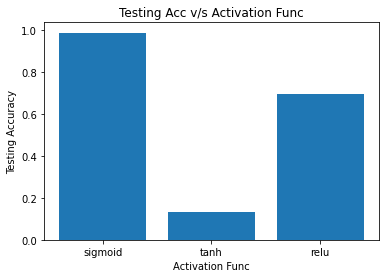

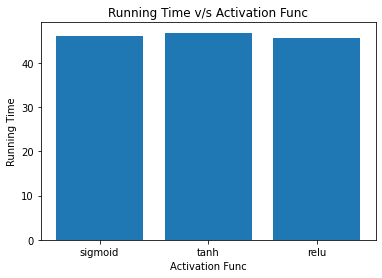

In [37]:
# Creating the bar plots
# Train graph
plt.bar(number_layers, train_acc) 

plt.xlabel("Activation Func") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Activation Func") 
plt.show() 

# Test graph
plt.bar(number_layers, test_acc) 
  
plt.xlabel("Activation Func") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Activation Func") 
plt.show() 

# Time graph
plt.bar(number_layers, time_ls) 
  
plt.xlabel("Activation Func") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Activation Func") 
plt.show() 

5. Combination of filter sizes

In [40]:
def my_model(X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Combination------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Layer 2
  model.add(Conv2D(16, (5, 5), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [41]:
# Automated loop for different combination of filter sizes
test_acc = []
train_acc = []
time_ls = []

train, test, time_calc = my_model(X_train, y_train)
train_acc.append(train)
test_acc.append(test)
time_ls.append(time_calc)




------------------------------------Combination------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9862


In [42]:
print(test_acc)
print(train_acc)
print(time_ls)

[0.9861999750137329]
[0.9932666420936584]
[63.98779821395874]


6. Layer filter Combinations

In [49]:
def my_model(n, f, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Layers {n}------------------------------------\n\n\n")
  print(f"\n\n\n------------------------------------Filter Size {f}------------------------------------\n\n\n")

  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Looping
  '''
  Since we're using the same type and # of Filters, etc. in every layer
  '''
  for i in range(1,n):
    model.add(Conv2D(16, (f, f), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [50]:
# Automated loop for different number of layers
number_layers = [1]
filter_size = [4, 32, 64]
test_acc = []
train_acc = []
time_ls = []

for i in range(len(number_layers)):
  for j in range(len(filter_size)):
    train, test, time_calc = my_model(number_layers[i], filter_size[j], X_train, y_train)
    train_acc.append(train)
    test_acc.append(test)
    time_ls.append(time_calc)




------------------------------------Layers 1------------------------------------






------------------------------------Filter Size 4------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1496 - accuracy: 0.9790



------------------------------------Layers 1------------------------------------






------------------------------------Filter Size 32------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9782



------------------------------------Layers 1------------------------------------






------------------------------------Filter Size 64------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1166 - accuracy: 0.9777


In [55]:
print(test_acc)
print(train_acc)
print(time_ls)

[0.9789999723434448, 0.9782000184059143, 0.9776999950408936]
[0.9966333508491516, 0.9968000054359436, 0.9950833320617676]
[56.346837282180786, 56.5301513671875, 56.696410179138184]


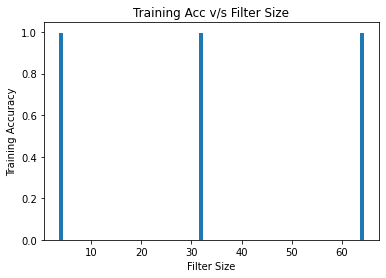

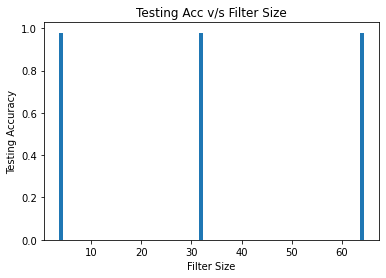

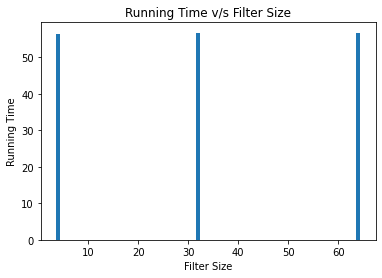

In [58]:
# Creating the bar plots
# Train graph
plt.bar(filter_size, train_acc) 

plt.xlabel("Filter Size") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Filter Size") 
plt.show() 

# Test graph
plt.bar(filter_size, test_acc) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Filter Size") 
plt.show() 

# Time graph
plt.bar(filter_size, time_ls) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Filter Size") 
plt.show() 

7. Influence of Striding

In [71]:
def my_model(n, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Striding Size {n}------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (3, 3), strides=(n, n), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Looping
  '''
  Since we're using the same type and # of Filters, etc. in every layer
  '''
  for i in range(1,n):
    model.add(Conv2D(16, (3, 3), strides=(n, n), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [72]:
# Automated loop for different striding sizes
number_layers = [1, 2]
test_acc = []
train_acc = []
time_ls = []

# Error for 3 filter size for striding because of image
for i in number_layers:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Striding Size 1------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9788



------------------------------------Striding Size 2------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1338 - accuracy: 0.9619


In [73]:
# Updating the number_layers to plot graph
number_layers = [1, 2]

print(test_acc)
print(train_acc)
print(time_ls)

[0.9787999987602234, 0.961899995803833]
[0.9960333108901978, 0.9691166877746582]
[56.45902895927429, 50.09596848487854]


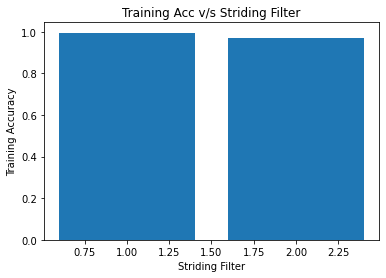

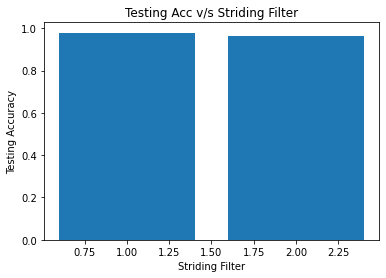

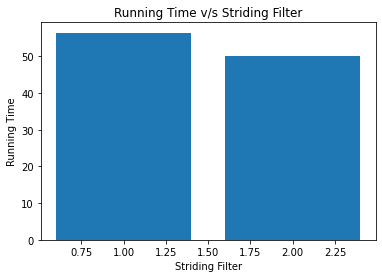

In [74]:
# Creating the bar plots
# Train graph
plt.bar(number_layers, train_acc) 

plt.xlabel("Striding Filter") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Striding Filter") 
plt.show() 

# Test graph
plt.bar(number_layers, test_acc) 
  
plt.xlabel("Striding Filter") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Striding Filter") 
plt.show() 

# Time graph
plt.bar(number_layers, time_ls) 
  
plt.xlabel("Striding Filter") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Striding Filter") 
plt.show() 

8. Influence of Padding

In [75]:
def my_model(n, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Padding Same, Filter Size {n}x{n}------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (n, n), padding='same', activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  
  # Looping
  '''
  Since we're using the same type and # of Filters, etc. in every layer
  '''
  for i in range(1,2):
    model.add(Conv2D(16, (n, n), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [79]:
# Automated loop for different striding sizes
filter_size = [1, 2, 3]
test_acc = []
train_acc = []
time_ls = []

# Error for 3 filter size for striding because of image
for i in filter_size:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Padding Same, Filter Size 1x1------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9345



------------------------------------Padding Same, Filter Size 2x2------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0846 - accuracy: 0.9812



------------------------------------Padding Same, Filter Size 3x3------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9856


In [80]:
print(test_acc)
print(train_acc)
print(time_ls)

[0.934499979019165, 0.9811999797821045, 0.9855999946594238]
[0.9438166618347168, 0.9938333630561829, 0.9952333569526672]
[52.3418447971344, 58.65100288391113, 57.87803363800049]


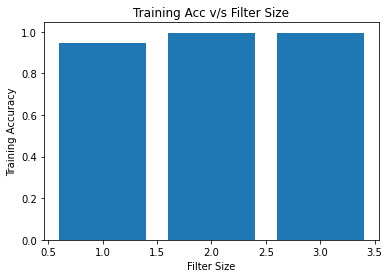

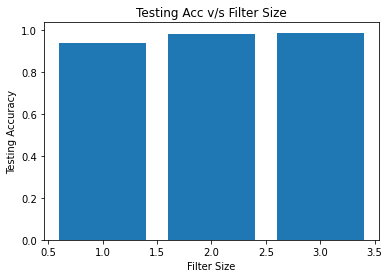

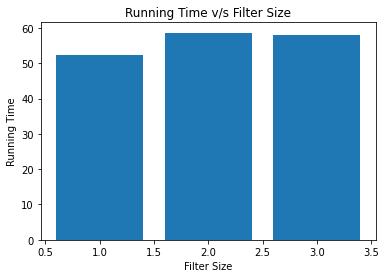

In [81]:
# Creating the bar plots
# Train graph
plt.bar(filter_size, train_acc) 

plt.xlabel("Filter Size") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Filter Size") 
plt.show() 

# Test graph
plt.bar(filter_size, test_acc) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Filter Size") 
plt.show() 

# Time graph
plt.bar(filter_size, time_ls) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Filter Size") 
plt.show() 

9. Influence of Pooling


In [82]:
def my_model(n, X_train, y_train):
  model = keras.Sequential()

  print(f"\n\n\n------------------------------------Pooling Filter Size {n}x{n}------------------------------------\n\n\n")
  
  # Layer 1
  # I'm gonna loop over the same code for n number of times :)
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((n, n)))
  
  # Looping
  '''
  Since we're using the same type and # of Filters, etc. in every layer
  '''
  for i in range(1,2):
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D((n, n)))
  
  # Flatten layer is included once
  model.add(Flatten())

  # Fully Connected Layers
  # FCL1
  model.add(Dense(100, activation='relu'))

  #FCL2
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Calculating the time for training the model
  start = time.time()
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
      
  # Sleeping for 1 sec to get 10 sec runtime
  time.sleep(1)

  # End time
  end = time.time()
  
  # Accuracies
  _, train_acc = model.evaluate(X_train, y_train)
  _, test_acc = model.evaluate(X_test,y_test)
  
  total = end-start

  return train_acc, test_acc, total

In [86]:
# Automated loop for different striding sizes
filter_size = [1, 2, 3, 4]
test_acc = []
train_acc = []
time_ls = []

# Error for 3 filter size for striding because of image
for i in filter_size:
  train, test, time_calc = my_model(i, X_train, y_train)
  train_acc.append(train)
  test_acc.append(test)
  time_ls.append(time_calc)




------------------------------------Pooling Filter Size 1x1------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1512 - accuracy: 0.9811



------------------------------------Pooling Filter Size 2x2------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9839



------------------------------------Pooling Filter Size 3x3------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9854



------------------------------------Pooling Filter Size 4x4------------------------------------



313/313 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9622


In [87]:
print(test_acc)
print(train_acc)
print(time_ls)

[0.9811000227928162, 0.9839000105857849, 0.9854000210762024, 0.9621999859809875]
[0.9978166818618774, 0.9958333373069763, 0.9909999966621399, 0.9667500257492065]
[72.11777973175049, 58.76347780227661, 59.35420799255371, 50.95042848587036]


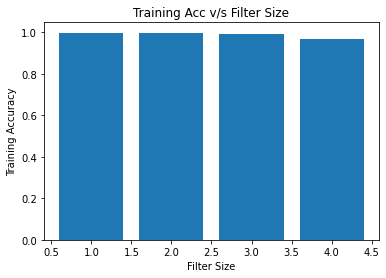

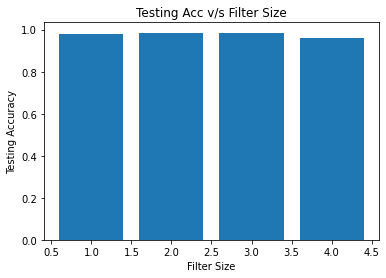

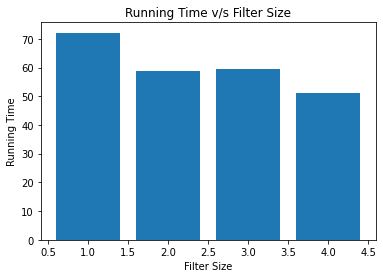

In [88]:
# Creating the bar plots
# Train graph
plt.bar(filter_size, train_acc) 

plt.xlabel("Filter Size") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Filter Size") 
plt.show() 

# Test graph
plt.bar(filter_size, test_acc) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Testing Accuracy") 
plt.title("Testing Acc v/s Filter Size") 
plt.show() 

# Time graph
plt.bar(filter_size, time_ls) 
  
plt.xlabel("Filter Size") 
plt.ylabel("Running Time") 
plt.title("Running Time v/s Filter Size") 
plt.show() 